In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [367]:
num_runs = 10
enemy_num = 5
AE = ['arithmetic','one_point']

In [300]:
df_list1 = []
df_list2 = []

for i in range(num_runs):
    for j in AE:
        if j == 'arithmetic':
            df_list1.append(pd.read_csv("individual_task1/results_{}_{}_{}.txt".format(enemy_num, i, j), sep=" ", index_col=0))
        elif j == 'one_point':
            df_list2.append(pd.read_csv("individual_task1/results_{}_{}_{}.txt".format(enemy_num, i, j), sep=" ", index_col=0))

df1 = pd.concat(df_list1)
df2 = pd.concat(df_list2)

In [327]:
mean_of_means1 = np.array(df1.groupby(df1.index)['mean'].mean())
sd_of_means1 = np.array(df1.groupby(df1.index)['mean'].std())
mean_of_bests1 = np.array(df1.groupby(df1.index)['best'].mean())
sd_of_bests1 = np.array(df1.groupby(df1.index)['best'].std())

mean_of_means2 = np.array(df2.groupby(df2.index)['mean'].mean())
sd_of_means2 = np.array(df2.groupby(df2.index)['mean'].std())
mean_of_bests2 = np.array(df2.groupby(df2.index)['best'].mean())
sd_of_bests2 = np.array(df2.groupby(df2.index)['best'].std())
gen_nums = np.arange(len(mean_of_means1))

In [328]:
lb_mean1 = mean_of_means1 - sd_of_means1
ub_mean1 = mean_of_means1 + sd_of_means1
lb_best1 = mean_of_bests1 - sd_of_bests1
ub_best1 = mean_of_bests1 + sd_of_bests1

lb_mean2 = mean_of_means2 - sd_of_means2
ub_mean2 = mean_of_means2 + sd_of_means2
lb_best2 = mean_of_bests2 - sd_of_bests2
ub_best2 = mean_of_bests2 + sd_of_bests2

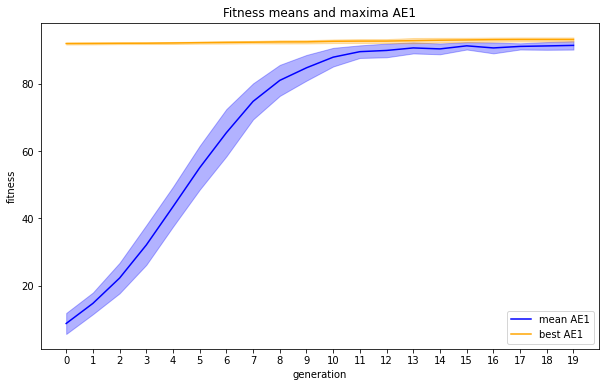

In [372]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(mean_of_means1, label='mean AE1', color="blue")
ax.plot(mean_of_bests1, label='best AE1', color="orange")

'''Uitcommenten voor plot van beide in één'''
# ax.plot(mean_of_means2, label='mean AE2', color="green")
# ax.plot(mean_of_bests2, label='best AE2', color="red")

# plt.fill_between(gen_nums, lb_mean2, ub_mean2, alpha=.3, color="green")
# plt.fill_between(gen_nums, lb_best2, ub_best2, alpha=.3, color="red")

plt.fill_between(gen_nums, lb_mean1, ub_mean1, alpha=.3, color="blue")
plt.fill_between(gen_nums, lb_best1, ub_best1, alpha=.3, color="orange")
plt.xticks(gen_nums)
ax.set_xlabel("generation")
ax.set_ylabel("fitness")
ax.set_title("Fitness means and maxima AE1")
ax.legend()
fig.savefig("lineplot_AE1.jpg",dpi=300, bbox_inches='tight')
# plt.show()

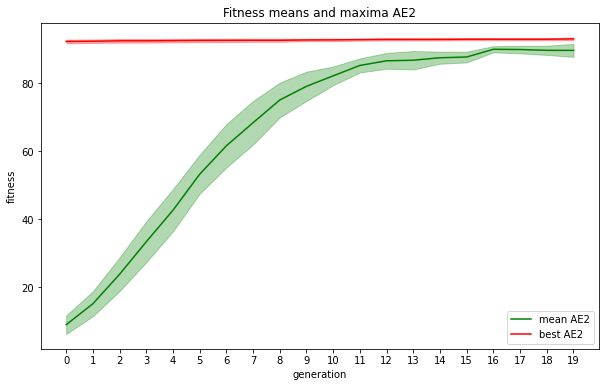

In [362]:
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(mean_of_means2, label='mean AE2', color="green")
ax1.plot(mean_of_bests2, label='best AE2', color="red")

plt.fill_between(gen_nums, lb_mean2, ub_mean2, alpha=.3, color="green")
plt.fill_between(gen_nums, lb_best2, ub_best2, alpha=.3, color="red")
plt.xticks(gen_nums)
ax1.set_xlabel("generation")
ax1.set_ylabel("fitness")
ax1.set_title("Fitness means and maxima AE2")
ax1.legend()
fig1.savefig("lineplot_AE2.jpg",dpi=300, bbox_inches='tight')
# plt.show()

In [368]:
box_dfs1 = []
box_dfs2 = []
AE = ['arithmetic','one_point']

for i in range(num_runs):
    for j in AE:
        if j == 'arithmetic':
            box_dfs1.append(pd.read_csv("individual_task1/boxplot_{}_{}_{}.txt".format(enemy_num, i, j), sep="\n", header=None))
        elif j == 'one_point':
            box_dfs2.append(pd.read_csv("individual_task1/boxplot_{}_{}_{}.txt".format(enemy_num, i, j), sep="\n", header=None))

data1 = pd.concat(box_dfs1, axis = 1)
data2 = pd.concat(box_dfs2, axis = 1)

In [369]:
means1 = data1.mean()
means2 = data2.mean()
means = pd.concat([means1, means2], axis=1)

,0,1
0,48.32,79.96
0,78.04,71.44
0,67.96,81.88
0,77.80,86.80
0,86.08,69.36
0,79.84,73.00
0,76.96,87.88
0,57.16,78.76
0,82.96,82.00
0,71.32,78.04


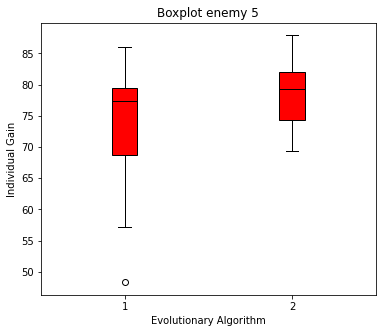

In [373]:
fig2, ax2 = plt.subplots(figsize=(6,5))
c='red'
c1='black'
ax2.boxplot(means, patch_artist=True,
            boxprops=dict(facecolor=c, color=c1),
            capprops=dict(color=c1),
            whiskerprops=dict(color=c1),
            flierprops=dict(color=c, markeredgecolor=c1),
            medianprops=dict(color=c1))
ax2.set_xlabel("Evolutionary Algorithm")
ax2.set_ylabel("Individual Gain")
ax2.set_title("Boxplot enemy {}".format(enemy_num))
ax2 = fig.gca()
fig2.savefig("boxplot_enemy_{}.jpg".format(enemy_num),dpi=300, bbox_inches='tight')
# plt.show()